In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# UmojaHack Rwanda: Expresso Churn Prediction Challenge

When customers leave, this can be very costly for the company, thus firms are interested in predicting churn beforehand. Having that information in hand can help companies change their strategy to retain customers.

In this starter notebook, we'll walk through the competition. We will show you how to load the data and do a quick exploratory analysis. Then, we will train a simple model, make some predictions, and then submit those predictions to the competition.

The data we have describes 2.5 million [Expresso](https://www.expressotelecom.sn/) clients. Expresso is an African telecommunications services company that provides telecommunication services in five African markets: Mauritania, Senegal, Guinea, and Ghana. Expresso offers a wide range of products and services to meet the needs of customers.

The objective of this hackathon is to develop a predictive model that determines the likelihood for a customer to churn - to stop purchasing airtime and data from Expresso. Let's dig in!

## Table of Contents:
&nbsp;&nbsp;1. [LOADING THE DATA](#1)
   
&nbsp;&nbsp;2. [EXPLORING THE DATA](#2)   

&nbsp;&nbsp;3. [BUILDING SOME MODELS](#3)   

&nbsp;&nbsp;4. [GENERATING THE PREDICTIONS FOR THE TEST SET](#4)

# LOADING THE DATA

On the [data description page](https://zindi.africa/hackathons/umojahack-rwanda-expresso-churn-prediction-challenge/data), we are provided with everything we need to get started:

Train.csv: this is what you will use to train your model.

Test.csv: this is what you will test your model on.

SampleSubmission.csv: This file serves as an example for how to format your submission.

Let's start by importing the libraries that we will need to load and explore the data.

In [ ]:
##importing packages

import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
# import missingno as msno

Next, we can load the datasets and begin taking a look.

In [ ]:
!unzip -P  rhnxc '/content/drive/My Drive/data/UmojaHackUniversity.zip'

#reading in the data
train = pd.read_csv('UmojaHack/Train.csv')
test = pd.read_csv('UmojaHack/Test.csv')
submission_file = pd.read_csv('UmojaHack/SampleSubmission.csv')
describtion = pd.read_csv('UmojaHack/VariableDefinitions.csv') 

Archive:  /content/drive/My Drive/data/UmojaHackUniversity.zip
replace UmojaHack/Test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
train.head()

In [ ]:
train.head(20)

Each row is/was an expresso client. The columns are the different attributes of the customers. 

In [ ]:
train.info()#quite the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB





There are more than 2M customers in the training set.

In [ ]:
test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,THIES,K > 24 month,5000.0,5.0,5000.0,1667.0,5.0,NaN,378.0,11.0,5.0,NaN,NaN,NO,42,On-net 1000F=10MilF;10d,5.0
1,000055d41c8a62052dd426592e8a4a3342bf565d,NaN,I 18-21 month,300.0,2.0,326.0,109.0,3.0,397.0,NaN,0.0,NaN,NaN,NaN,NO,41,"Data: 100 F=40MB,24H",1.0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,DAKAR,K > 24 month,3300.0,25.0,3400.0,1133.0,26.0,7150.0,0.0,2.0,5.0,NaN,NaN,NO,57,"Data: 100 F=40MB,24H",22.0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,9,NaN,NaN
4,0000bae5480628cf8fe51ad84bcb39772fc79224,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,10,NaN,NaN


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380127 entries, 0 to 380126
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         380127 non-null  object 
 1   REGION          230399 non-null  object 
 2   TENURE          380127 non-null  object 
 3   MONTANT         247072 non-null  float64
 4   FREQUENCE_RECH  247072 non-null  float64
 5   REVENUE         252754 non-null  float64
 6   ARPU_SEGMENT    252754 non-null  float64
 7   FREQUENCE       252754 non-null  float64
 8   DATA_VOLUME     193087 non-null  float64
 9   ON_NET          241613 non-null  float64
 10  ORANGE          222897 non-null  float64
 11  TIGO            153126 non-null  float64
 12  ZONE1           29861 non-null   float64
 13  ZONE2           24076 non-null   float64
 14  MRG             380127 non-null  object 
 15  REGULARITY      380127 non-null  int64  
 16  TOP_PACK        221348 non-null  object 
 17  FREQ_TOP_P

In [ ]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data.Total > 0]

,Total,Percent
ZONE2,2017224,0.936481
ZONE1,1984327,0.921208
TIGO,1290016,0.598880
DATA_VOLUME,1060433,0.492298
TOP_PACK,902594,0.419022
FREQ_TOP_PACK,902594,0.419022
ORANGE,895248,0.415612
REGION,849299,0.394280
ON_NET,786675,0.365208
MONTANT,756739,0.351310


In [ ]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data.Total > 0]

,Total,Percent
ZONE2,356051,0.936663
ZONE1,350266,0.921445
TIGO,227001,0.597171
DATA_VOLUME,187040,0.492046
TOP_PACK,158779,0.417700
FREQ_TOP_PACK,158779,0.417700
ORANGE,157230,0.413625
REGION,149728,0.393889
ON_NET,138514,0.364389
FREQUENCE_RECH,133055,0.350028


In [ ]:
train.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,1.397309e+06,1.397309e+06,1.428000e+06,1.428000e+06,1.428000e+06,1.093615e+06,1.367373e+06,1.258800e+06,864032.000000,169721.000000,136824.000000,2.154048e+06,1.251454e+06,2.154048e+06
mean,5.532117e+03,1.152912e+01,5.510810e+03,1.836943e+03,1.397814e+01,3.366450e+03,2.776891e+02,9.541871e+01,23.109253,8.170132,7.553309,2.804251e+01,9.272461e+00,1.875474e-01
std,7.111339e+03,1.327407e+01,7.187113e+03,2.395700e+03,1.469403e+01,1.330446e+04,8.726889e+02,2.049873e+02,63.578086,41.169511,33.487234,2.228686e+01,1.228044e+01,3.903504e-01
min,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+03,2.000000e+00,1.000000e+03,3.330000e+02,3.000000e+00,0.000000e+00,5.000000e+00,7.000000e+00,2.000000,0.000000,0.000000,6.000000e+00,2.000000e+00,0.000000e+00
50%,3.000000e+03,7.000000e+00,3.000000e+03,1.000000e+03,9.000000e+00,2.570000e+02,2.700000e+01,2.900000e+01,6.000000,1.000000,2.000000,2.400000e+01,5.000000e+00,0.000000e+00
75%,7.350000e+03,1.600000e+01,7.368000e+03,2.456000e+03,2.000000e+01,2.895000e+03,1.560000e+02,9.900000e+01,20.000000,3.000000,5.000000,5.100000e+01,1.200000e+01,0.000000e+00
max,4.700000e+05,1.330000e+02,5.321770e+05,1.773920e+05,9.100000e+01,1.823866e+06,5.080900e+04,2.132300e+04,4174.000000,4792.000000,3697.000000,6.200000e+01,7.130000e+02,1.000000e+00


In [ ]:
test.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
count,247072.000000,247072.000000,252754.000000,252754.000000,252754.000000,193087.000000,241613.000000,222897.000000,153126.000000,29861.000000,24076.000000,380127.000000,221348.000000
mean,5524.958826,11.519853,5499.680468,1833.232443,13.957963,3346.095454,278.806310,95.193008,23.052088,8.164663,7.655300,28.081699,9.261584
std,7116.320922,13.242743,7195.093138,2398.360570,14.652660,12002.653047,874.253933,203.950776,65.042688,48.857605,33.021478,22.289094,12.268907
min,25.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000,5.000000,7.000000,2.000000,0.000000,0.000000,6.000000,2.000000
50%,3000.000000,7.000000,3000.000000,1000.000000,9.000000,259.000000,27.000000,29.000000,6.000000,1.000000,2.000000,24.000000,5.000000
75%,7350.000000,16.000000,7351.000000,2450.000000,19.000000,2884.000000,157.000000,99.000000,20.000000,3.000000,5.000000,51.000000,12.000000
max,201500.000000,146.000000,200965.000000,66988.000000,91.000000,977796.000000,26786.000000,6345.000000,3708.000000,4215.000000,1649.000000,62.000000,390.000000


In [ ]:
train.describe(exclude = np.number)#no duplicates in user_id, MRG is useless

,user_id,REGION,TENURE,MRG,TOP_PACK
count,2154048,1304749,2154048,2154048,1251454
unique,2154048,14,8,1,140
top,58b3593a3586a6c09e3fecca0f5c88b8de052067,DAKAR,K > 24 month,NO,All-net 500F=2000F;5d
freq,1,513271,2043201,2154048,317802


In [ ]:
test.describe(exclude = np.number)

,user_id,REGION,TENURE,MRG,TOP_PACK
count,380127,230399,380127,380127,221348
unique,380127,14,8,1,102
top,4e4419b1b0209629bd07a8e4674b599936c95ba5,DAKAR,K > 24 month,NO,All-net 500F=2000F;5d
freq,1,90615,360350,380127,56038


Let's delete the 'MRG' column since it consists of a single value. Also, let's delete colums 'ZONE2' and 'ZONE1' since they have so many missing values. 

In [ ]:
train.REGION.unique()

array(['FATICK', nan, 'DAKAR', 'LOUGA', 'TAMBACOUNDA', 'KAOLACK', 'THIES',
       'SAINT-LOUIS', 'KOLDA', 'KAFFRINE', 'DIOURBEL', 'ZIGUINCHOR',
       'MATAM', 'SEDHIOU', 'KEDOUGOU'], dtype=object)

In [ ]:
print(train.shape)
print()
print(test.shape)

(2154048, 19)

(380127, 18)


# EXPLORING THE DATA






Let's start by looking at the distribution of our target variable.

CHURN
0    1750062
1     403986
dtype: int64


Text(0, 0.5, 'Frequency')

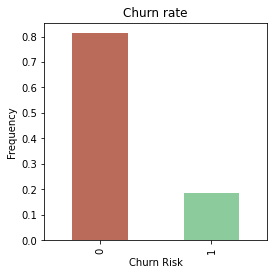

In [ ]:
print(train.groupby(['CHURN']).size())
#bar chart to show distribution of the target variable
n_obs = train.shape[0]
#index = ['No','Yes']
churn_plot = train['CHURN'].value_counts().div(n_obs).plot(kind='bar',figsize=(4,4),title="Churn rate", color=['#BB6B5A','#8CCB9B'])
churn_plot.set_xlabel("Churn Risk")
churn_plot.set_ylabel("Frequency")

It is imbalanced, with more than 80% of customers staying. Next, let's take a look at our features. We have a mix of continous and categorical features. 

Let's begin with the categorical features and investigate how the churn rate differ across the various levels of each categorical feature.

In [ ]:
def attrition_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of churn rate for `target` against 
    `col`. 
    
    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes 
            object to attach plot to
    """
    counts = (train[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax, color = ['g', 'r'])
    ax.invert_yaxis()
    ax.legend().remove()

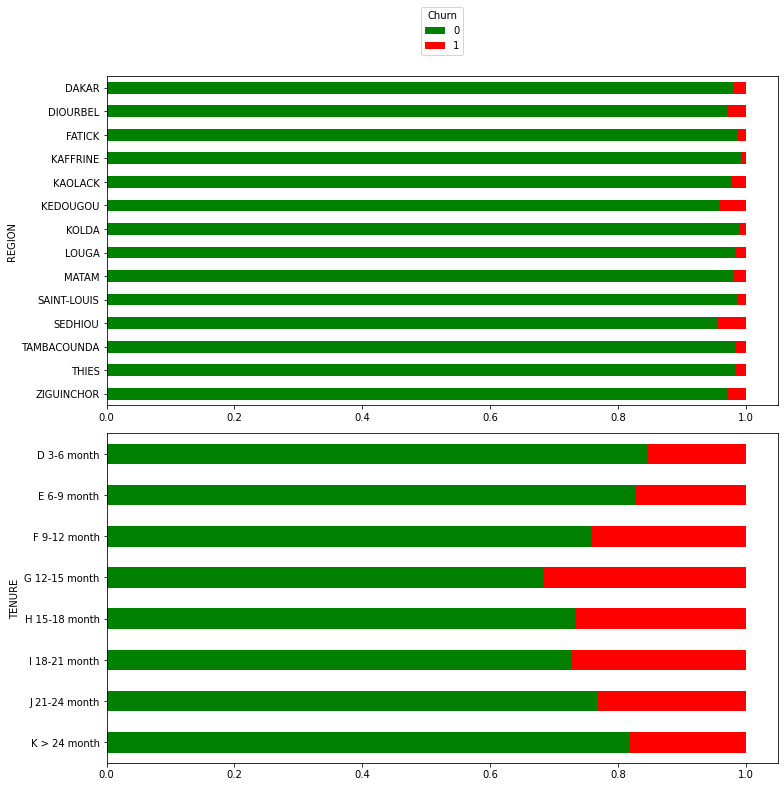

In [ ]:
cols_to_plot = [
    'REGION',
    'TENURE'
]

fig, ax = plt.subplots(
    len(cols_to_plot), 1, figsize=(11,11)
)
for idx, col in enumerate(cols_to_plot):
    attrition_rate_plot(
        col, 'CHURN', train, ax=ax[idx]
    )

ax[0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='Churn'
)

fig.tight_layout()

It looks like customers with tenure between 12 and 15 months have the highest churn rate while new customers have the lowest.

Now, let's look at the relationship between the recharge amount and the monthly revenue

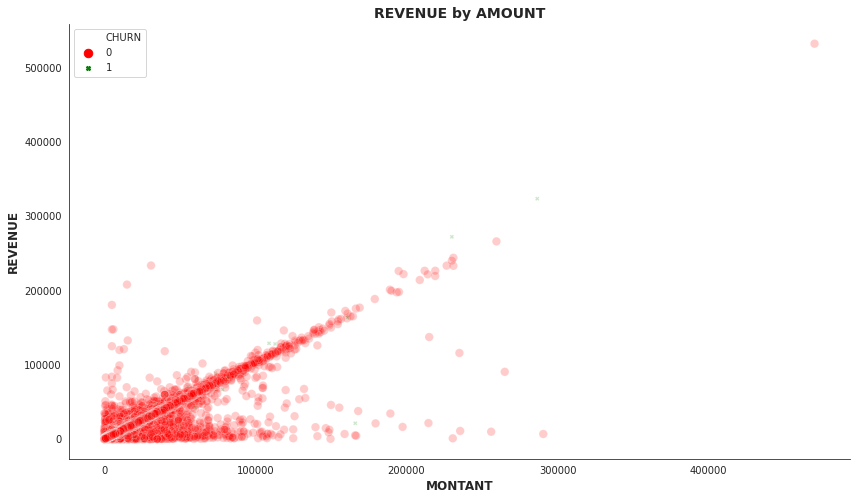

In [ ]:
# Set initial plot options
sns.set_style('white')
plt.figure(figsize = (14, 8))

# Create scatterplot
sns.scatterplot(x = "MONTANT", 
                y = "REVENUE", 
                # Group by and change dot style and  by CHURN
                hue = "CHURN",
                size = "CHURN",  
                style = "CHURN", 
                data = train, 
                # Change color of hue categories
                palette = ["r", "g"],
                alpha = 0.2)

# Despine plot
sns.despine()
# Final formatting touches
plt.xlabel("MONTANT", fontsize = 12, fontweight = "semibold")
plt.ylabel("REVENUE", fontsize = 12, fontweight = "semibold")
plt.title("REVENUE by AMOUNT", fontsize = 14, fontweight = "semibold")
plt.show()










There seems to be some correlation between the two and also there's some outliers. Outliers can create bias in a model's performance. Should we keep them or remove them? I will let you decide.

# BUILDING SOME MODELS





















Let's train a model using the [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). We chose the logistic regression because it is fast and serve as a good baseline.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score

RANDOM_SEED = 123    # Set a random seed for reproducibility!

Some models, including logistic regression, only work with numeric input for features. So we'll either have to drop the categorical features or transform them. We'll opt for the later since we want to capture as much as information as we can. To do this, we'll use a method called [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

We also need to do some preprocessing for the numeric features. We have to scale each numeric feature and the reason for that is because we are using [regularization](https://en.wikipedia.org/wiki/Regularization_(mathematics)). We will use the [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), it transforms each feature such that its distribution has a mean value of 0 and a standard deviation of 1.

Another issue we have to take care of is the missing values since logistic regression can't handle them. For that, we'll use theSimpleImputer (https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) function.

This is quite a lot of steps but not to worry, we'll use Scikit-Learn's built-in composition functionality to encapsulate everything into a pipeline. 

### Feature Preprocessing

In [ ]:
#reading in the data
train = pd.read_csv('UmojaHack/Train.csv')
test = pd.read_csv('UmojaHack/Test.csv')
submission_file = pd.read_csv('UmojaHack/SampleSubmission.csv')
describtion = pd.read_csv('UmojaHack/VariableDefinitions.csv') 

In [ ]:
# train = train.drop(['MRG', 'ZONE2', 'ZONE1'], axis = 1)
# test = test.drop(['MRG', 'ZONE2', 'ZONE1'], axis = 1)
train = train.drop(['user_id', 'MRG', 'ZONE2', 'ZONE1'], axis = 1)
test = test.drop(['user_id', 'MRG', 'ZONE2', 'ZONE1'], axis = 1)

# def prep(train):

feat_operator = train[['ON_NET', 'ORANGE', 'TIGO']]
feat_operator = feat_operator.apply(lambda x:x.fillna(x.value_counts().index[0]))
train[['ON_NET', 'ORANGE', 'TIGO']] = feat_operator
#------------------------------------------
columns_means = ['MONTANT', 'FREQUENCE_RECH', 'FREQUENCE', 'REVENUE', 'FREQ_TOP_PACK']

for column_mean in columns_means:
    mean_rev = round(np.log(train[[column_mean]].mean()[0]), 2)
    train[column_mean] = np.log(train[[column_mean]].fillna(mean_rev))
#-------------------------------------
mean_rev = round(np.log(1+train[['ARPU_SEGMENT']].mean()[0]), 2)
train['ARPU_SEGMENT'] = np.log(1+train[['ARPU_SEGMENT']].fillna(mean_rev))

train['REGION'] = train[['REGION']].fillna('unknown')

#     fill_list = list(train[['DATA_VOLUME']].dropna().values.reshape(-1))

#     m = train['DATA_VOLUME'].isnull()
#     #set NaNs values
#     train.loc[m, 'DATA_VOLUME'] = np.random.choice(fill_list, size=m.sum())
#     train['DATA_VOLUME'] = np.log(1+train[['DATA_VOLUME']])
#     return train

# train = prep(train)
# test = prep(test)

In [ ]:
# train.columns[train.dtypes != "object"].values

In [ ]:
numeric_cols = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',\
                   'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'REGULARITY', 'FREQ_TOP_PACK']
print(numeric_cols)

['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'REGULARITY', 'FREQ_TOP_PACK']


In [ ]:
#categorical_cols = df.columns[df.dtypes == "object"].values
categorical_cols = ['REGION', 'TENURE', 'TOP_PACK']
print(categorical_cols)

['REGION', 'TENURE', 'TOP_PACK']


In [ ]:
# chain preprocessing into a Pipeline object
# each step is a tuple of (name you chose, sklearn transformer)
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='constant', fill_value=0, add_indicator = True))
])

categorical_preprocessing_steps = Pipeline([
    ('simple_imputer', SimpleImputer(strategy='constant', fill_value='Missing', add_indicator = True)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# create the preprocessor stage of final pipeline
# each entry in the transformer list is a tuple of
# (name you choose, sklearn transformer, list of columns)
preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, numeric_cols),
        ('categorical', categorical_preprocessing_steps, categorical_cols)
    ],
    remainder = "drop"
)

### Putting Together the Full Pipeline

We put both the preprocessing functions and the estimatior into one Pipeline object, this allows to run the data through all the steps in one interface.

In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

full_pipeline_LGBM = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", LGBMClassifier(n_estimators= 50)
),
])

full_pipeline_XGB = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", XGBClassifier(max_depth = 10, tree_method = 'hist', n_estimators= 50)
),
])

In [ ]:
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [ ]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))




In [ ]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [ ]:
X_train

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,TOP_PACK,FREQ_TOP_PACK
329063,DAKAR,I 18-21 month,8.665613,2.944439,8.655737,7.557473,2.995732,NaN,66.0,27.0,10.0,27,All-net 500F=2000F;5d,1.609438
1434938,unknown,I 18-21 month,2.154085,0.891998,2.152924,2.142416,0.970779,NaN,0.0,1.0,1.0,2,NaN,0.802002
2055271,DIOURBEL,K > 24 month,7.600902,1.386294,7.822445,6.725034,1.791759,2947.0,0.0,1.0,1.0,31,"Data:490F=1GB,7d",1.609438
1365999,unknown,K > 24 month,2.154085,0.891998,2.152924,2.142416,0.970779,NaN,0.0,1.0,1.0,3,NaN,0.802002
1257533,LOUGA,K > 24 month,9.908475,3.433987,9.878221,8.779711,3.496508,2046.0,993.0,580.0,124.0,61,Jokko_Daily,3.044522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110351,TAMBACOUNDA,K > 24 month,2.154085,0.891998,6.274762,5.181784,0.693147,NaN,0.0,6.0,1.0,2,All-net 500F=2000F;5d,0.000000
521280,unknown,K > 24 month,5.298317,0.000000,5.288267,4.204693,0.000000,1.0,2.0,1.0,1.0,10,NaN,0.802002
1093715,unknown,K > 24 month,6.214608,0.000000,6.214608,5.123964,0.000000,0.0,4.0,20.0,0.0,16,MIXT:500F= 2500F on net _2500F off net;2d,0.000000
97033,unknown,K > 24 month,2.154085,0.891998,2.995732,2.079442,0.000000,159.0,0.0,1.0,1.0,32,NaN,0.802002


In [ ]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train)
timer(start_time)

Let's check out the full pipeline.

In [ ]:
# from sklearn import set_config

# full_pipeline

### Training and Evaluation

Let's split the data into a training and evaluation set. We'll use a third of our data for evaluation. 

Recall that we have an imbalanced dataset, so we'll use the stratify argument to enforce even splits.

In [ ]:
X_train, X_eval, y_train, y_eval = train_test_split(
    train.drop(['CHURN'], axis = 1),
    train.CHURN,
    test_size=0.33,
    shuffle=True,
    stratify=train.CHURN,
    random_state=RANDOM_SEED
)

In [ ]:
%%time

# Train model
full_pipeline_XGB.fit(X_train, y_train)

# Predict on evaluation set
# This competition wants probabilities, not labels
preds = full_pipeline_XGB.predict_proba(X_eval)
preds

CPU times: user 54.1 s, sys: 609 ms, total: 54.7 s
Wall time: 54.8 s


In [ ]:
from sklearn.metrics import log_loss
log_loss(y_eval, preds[:, 1])

0.25268017746219157

In [ ]:
%%time

# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
# This competition wants probabilities, not labels
preds_xgb = full_pipeline.predict_proba(X_eval)
preds_xgb

CPU times: user 2min 6s, sys: 1.36 s, total: 2min 7s
Wall time: 2min 7s


array([[9.9854136e-01, 1.4586513e-03],
       [6.8931776e-01, 3.1068224e-01],
       [9.9571234e-01, 4.2876806e-03],
       ...,
       [9.9954748e-01, 4.5254527e-04],
       [3.1955904e-01, 6.8044096e-01],
       [8.4488636e-01, 1.5511365e-01]], dtype=float32)

In [ ]:
new_preds = 1/2*(preds[:, 1]+preds_xgb[:, 1])

In [ ]:
log_loss(y_eval, preds_xgb[:, 1])

0.25317007245522427

0.2524448740666024

In [ ]:
log_loss(y_eval, new_preds)

0.25262555508815765

In [ ]:
from sklearn.metrics import classification_report
# print(classification_report(np.array(y_eval), preds[:, 1])) 

The competition uses the [Log loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html) as the evaluation metric, so let's check how our model did on the evaluation set.

The estimator spits out the probabilities for each class(0 and 1). We are interested in the second column, that is the probability of churn,so let's grab it.

In [ ]:
# import scipy as sp
# import scikitplot as skplt

In [ ]:
# print('Confusion matrix:\n', skplt.metrics.plot_confusion_matrix(y_eval, preds[:, 1].round()))

### Retrain Model on Full Dataset

Now that we have an idea of how the model performs, let's retrain on the full training set

In [ ]:
# %%time 

# full_pipeline.fit(train.drop(['user_id', 'CHURN'], axis = 1), train.CHURN)

# None   # So we don't print out the whole pipeline representation

# GENERATING THE PREDICTIONS FOR THE TEST SET

Let's make predictions on the test set! Remember, for this competition, we want the probabilities, not the binary label predictions. So just like we did earlier, we'll use the .predict_proba method to get those.

In [ ]:

# feat_operator = test[['ON_NET', 'ORANGE', 'TIGO']]
# feat_operator = feat_operator.apply(lambda x:x.fillna(x.value_counts().index[0]))
# test[['ON_NET', 'ORANGE', 'TIGO']] = feat_operator
# #------------------------------------------
# columns_means = ['MONTANT', 'FREQUENCE_RECH', 'FREQUENCE', 'REVENUE', 'FREQ_TOP_PACK']

# for column_mean in columns_means:
#     mean_rev = round(np.log(test[[column_mean]].mean()[0]), 2)
#     test[column_mean] = np.log(test[[column_mean]].fillna(mean_rev))
# #-------------------------------------
# mean_rev = round(np.log(1+test[['ARPU_SEGMENT']].mean()[0]), 2)
# test['ARPU_SEGMENT'] = np.log(1+test[['ARPU_SEGMENT']].fillna(mean_rev))

# test['REGION'] = test[['REGION']].fillna('unknown')


In [ ]:
test_probas_xgb = full_pipeline_XGB.predict_proba(test)
test_probas_xgb

array([[0.99564266, 0.00435735],
       [0.85505587, 0.14494413],
       [0.99579006, 0.00420995],
       ...,
       [0.7646134 , 0.23538661],
       [0.8411451 , 0.1588549 ],
       [0.9906861 , 0.00931386]], dtype=float32)

Let's use the submission file to submit the predicted values.

In [ ]:
submission_df = pd.read_csv('UmojaHack/SampleSubmission.csv')
submission_df.head()

,user_id,CHURN
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,0
1,000055d41c8a62052dd426592e8a4a3342bf565d,0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,0
4,0000bae5480628cf8fe51ad84bcb39772fc79224,0


We want to replace those 0s with our predictions. But first, we need to make sure that the rows of the submission file are in the same order as the test file. 

In [ ]:
# Make sure we have the rows in the same order
np.testing.assert_array_equal(test.index.values, 
                              submission_df.index.values)

Nothing happended, so we're good. We can safely can drop in the estimated values in the 'CHURN' column.

In [ ]:
# Save predictions to submission data frame
submission_df["CHURN"] = test_probas_xgb[:, 1]

submission_df.head()

,user_id,CHURN
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,0.004357
1,000055d41c8a62052dd426592e8a4a3342bf565d,0.144944
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,0.004210
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,0.367757
4,0000bae5480628cf8fe51ad84bcb39772fc79224,0.355204


In [ ]:
submission_df.to_csv('my_submission_2.csv', index=False)

In [ ]:
!head my_submission.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


Now, let's on head on over to [Zindi](https://zindi.africa/hackathons/umojahack-rwanda-expresso-churn-prediction-challenge) and make our submission.

# Things to try

* [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to find optimal hyper parameters. If you do chose to use gridsearch, I suggest splitting the dataset into small portions since the it is so large
* Mean target encoding
* [Principal component analysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) (PCA)
* Removing outliers
* Try different algorithms